In [26]:
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df1 = pd.read_csv("Chennai_Weather.csv")
df1.head()

,Date,Temperature,Humidity
0,1-09-2021,85.3,78.3
1,2-09-2021,82.9,79.1
2,3-09-2021,84.5,76.8
3,4-09-2021,83.0,77.3
4,5-09-2021,82.8,78.3


In [3]:
df2 = pd.read_csv("VIT_Solar_Power.csv")
df2.head()

,Date,Irradiance,Power
0,2021-09-01,46249.0,8398.411409
1,2021-09-02,22069.0,4007.536193
2,2021-09-03,35961.0,6530.201143
3,2021-09-04,38056.0,6910.634707
4,2021-09-05,50757.0,9217.024538


In [4]:
df3=pd.merge(df2, df1, left_index=True, right_index=True)
df3.head()

,Date_x,Irradiance,Power,Date_y,Temperature,Humidity
0,2021-09-01,46249.0,8398.411409,1-09-2021,85.3,78.3
1,2021-09-02,22069.0,4007.536193,2-09-2021,82.9,79.1
2,2021-09-03,35961.0,6530.201143,3-09-2021,84.5,76.8
3,2021-09-04,38056.0,6910.634707,4-09-2021,83.0,77.3
4,2021-09-05,50757.0,9217.024538,5-09-2021,82.8,78.3


In [5]:
df3.shape

(365, 6)

In [6]:
df3 = df3.drop("Date_y",axis=1)
df3.rename(columns={'Date_x': 'Date'}, inplace=True)
df3.head()

,Date,Irradiance,Power,Temperature,Humidity
0,2021-09-01,46249.0,8398.411409,85.3,78.3
1,2021-09-02,22069.0,4007.536193,82.9,79.1
2,2021-09-03,35961.0,6530.201143,84.5,76.8
3,2021-09-04,38056.0,6910.634707,83.0,77.3
4,2021-09-05,50757.0,9217.024538,82.8,78.3


In [7]:
df3.to_csv('Merge.csv', index=False)

In [8]:
df3.shape

(365, 5)

In [9]:
df3.isnull().sum()

Date           0
Irradiance     1
Power          1
Temperature    0
Humidity       0
dtype: int64

In [10]:
df3['Irradiance'] = df3['Irradiance'].fillna(df3['Irradiance'].mean())
df3['Power'] = df3['Power'].fillna(df3['Power'].mean())

In [11]:
df3.isnull().sum()

Date           0
Irradiance     0
Power          0
Temperature    0
Humidity       0
dtype: int64

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Irradiance   365 non-null    float64
 2   Power        365 non-null    float64
 3   Temperature  365 non-null    float64
 4   Humidity     365 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.4+ KB


In [13]:
df3['Date']=pd.to_datetime(df3['Date'])

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Irradiance   365 non-null    float64       
 2   Power        365 non-null    float64       
 3   Temperature  365 non-null    float64       
 4   Humidity     365 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.4 KB


In [15]:
df3.head()

,Date,Irradiance,Power,Temperature,Humidity
0,2021-09-01,46249.0,8398.411409,85.3,78.3
1,2021-09-02,22069.0,4007.536193,82.9,79.1
2,2021-09-03,35961.0,6530.201143,84.5,76.8
3,2021-09-04,38056.0,6910.634707,83.0,77.3
4,2021-09-05,50757.0,9217.024538,82.8,78.3


In [16]:
X = df3[['Irradiance', 'Temperature','Humidity']].to_numpy()
y = df3['Power'].to_numpy()

X

array([[46249. ,    85.3,    78.3],
       [22069. ,    82.9,    79.1],
       [35961. ,    84.5,    76.8],
       ...,
       [66207. ,    85. ,    84.7],
       [71866. ,    86.6,    81.3],
       [39187. ,    83.8,    87.8]])

In [17]:
X = X.reshape(365, 1, 3)


In [18]:
def time_based_split(X, y, train_ratio):
    # Function for splitting the data into training and test sets
    train_size = int(len(X) * train_ratio)
    X_train, X_test = X[0:train_size], X[train_size:]
    y_train, y_test = y[0:train_size], y[train_size:]
    return X_train, X_test, y_train, y_test


# Split the data into training and test sets
X_train, X_test, y_train, y_test = time_based_split(X, y, 0.9)

# Check the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (328, 1, 3)
X_test shape: (37, 1, 3)
y_train shape: (328,)
y_test shape: (37,)


In [19]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, LSTM, Input

# Defining the model
model = Sequential()

model.add(Input(shape=(1, 3)))
model.add(SimpleRNN(8, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 96        
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train,
                    epochs=50, batch_size=32,
                    validation_split=0.1, verbose=0)

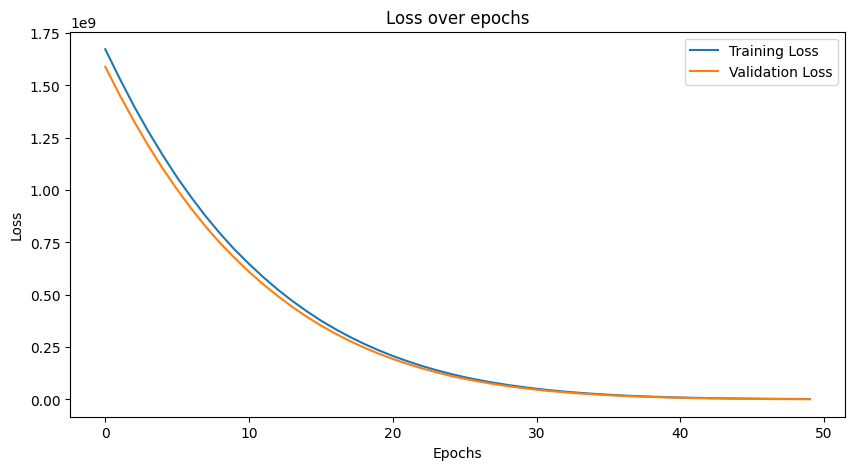

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting loss and accuracy from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting loss using seaborn lineplot
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(loss)), y=loss, label='Training Loss')
sns.lineplot(x=range(len(val_loss)), y=val_loss, label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
# Testing model on test data
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', test_loss)

Test Loss: 1459306.25


2/2 [==============================] - 0s 0s/step


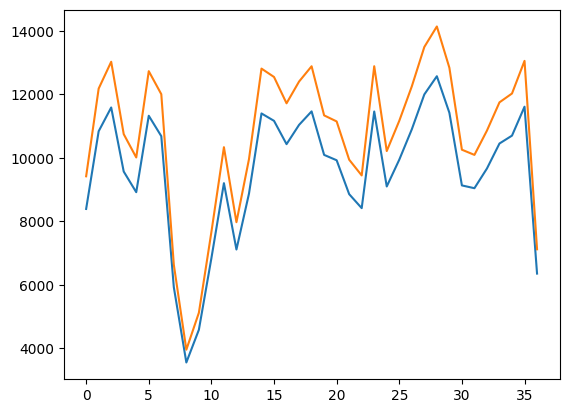

In [23]:
# Plotting predicted data

# Predicting target for X_test
y_pred = model.predict(X_test)

# plotting test data
plt.plot(y_pred)
plt.plot(y_test)

In [27]:
# Calculate R2
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate adjusted R2
n = len(y_test)
p = 1  # assuming only one predictor variable
r2_adj = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Print results
print(f"R2: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"Adjusted R2: {r2_adj:.3f}")

R2: 0.728
RMSE: 1208.018
MSE: 1459306.656
MAE: 1178.451
Adjusted R2: 0.721
